# Boosting

In [ ]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos 
ruta_datos = '/workspace/boosting/data/raw/diabetes.csv'  # Asegúrate de que la ruta sea correcta
diabetes = pd.read_csv(ruta_datos)

# Mostrar las primeras filas
print(diabetes.head())

# Ver la estructura del conjunto de datos
print("\nInformación del conjunto de datos:")
print(diabetes.info())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64 

In [4]:
# Comprobar si hay valores nulos
print("\nValores nulos por columna:")
print(diabetes.isnull().sum())

# Comprobar duplicados
print("\nCantidad de duplicados:")
print(diabetes.duplicated().sum())



Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Cantidad de duplicados:
0


# inicio del EDA

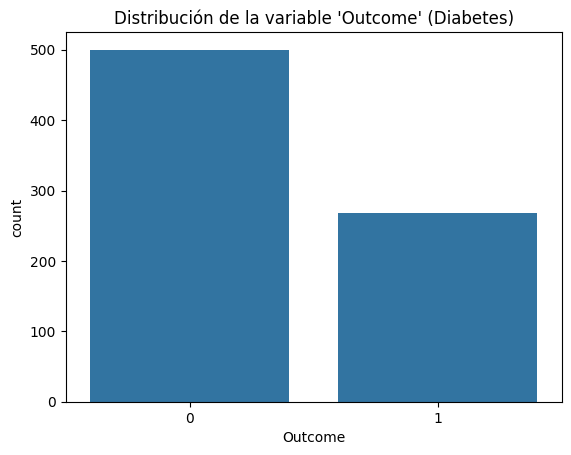

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ver la distribución de la variable objetivo 'Outcome'
sns.countplot(x='Outcome', data=diabetes)
plt.title("Distribución de la variable 'Outcome' (Diabetes)")
plt.show()



Estadísticas descriptivas de las características:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.76023

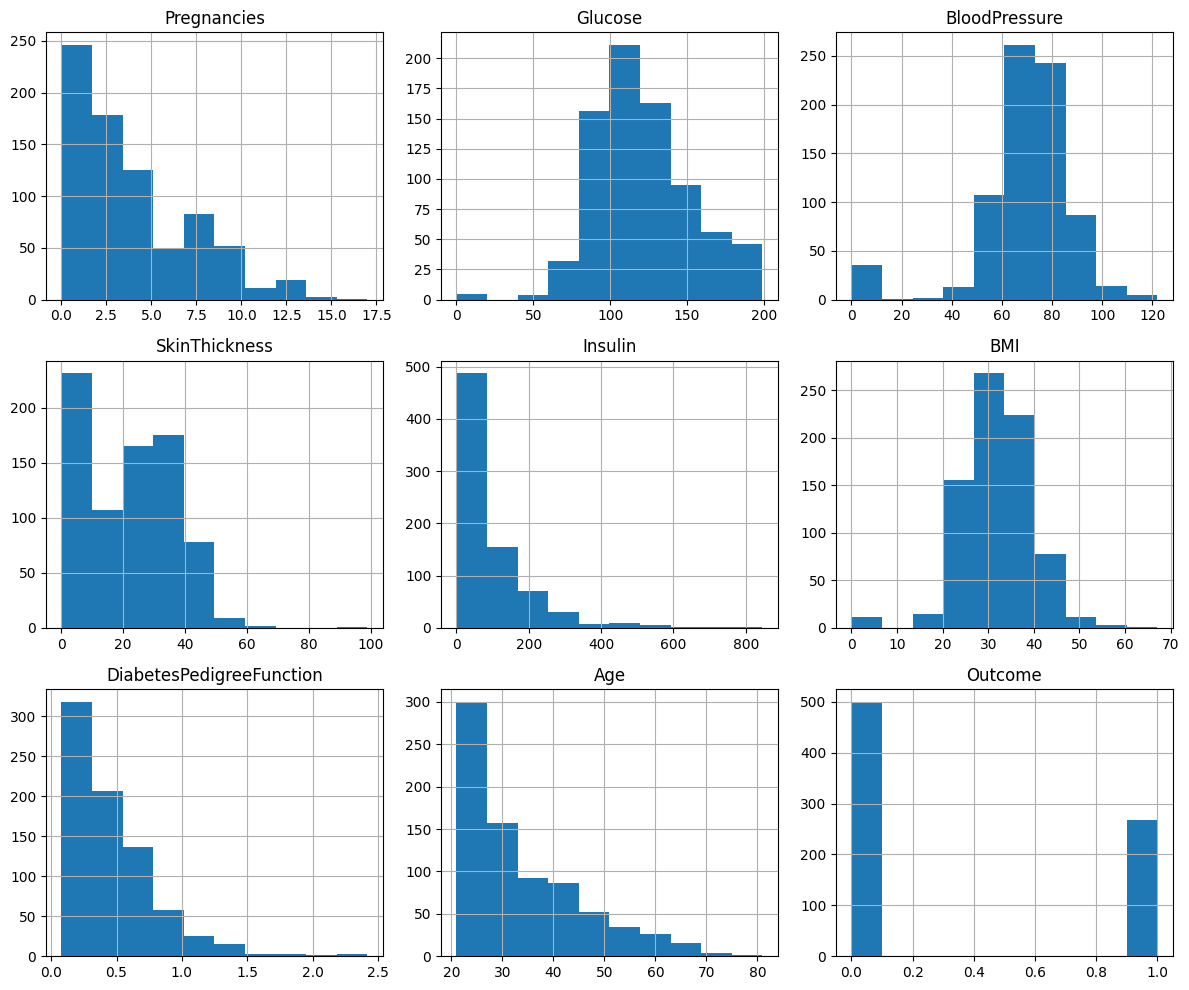

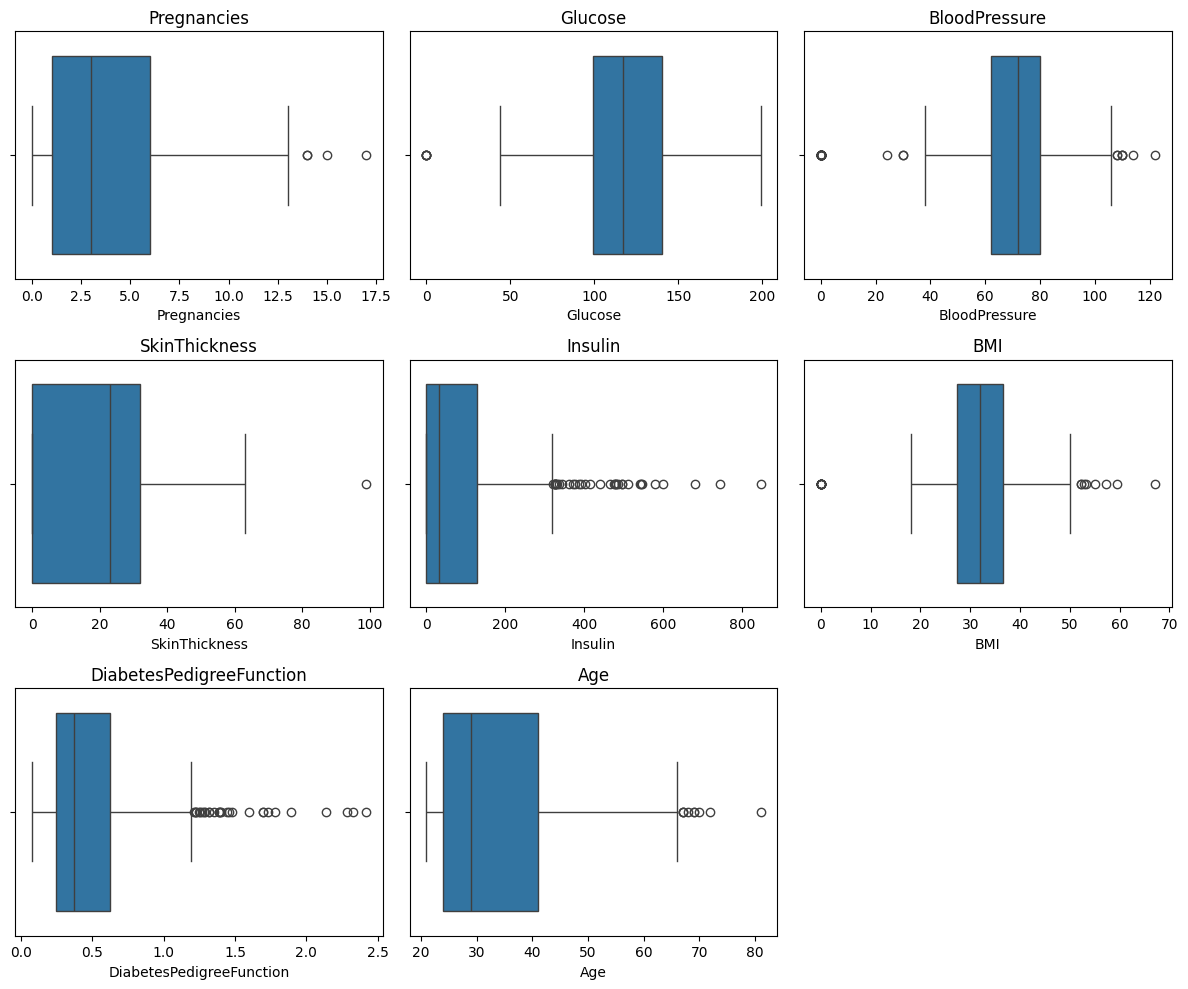

In [6]:
# Visualizar estadísticas descriptivas
print("\nEstadísticas descriptivas de las características:")
print(diabetes.describe())

# Visualizar histogramas para cada variable continua
diabetes.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Visualizar boxplots para detectar outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(diabetes.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=diabetes[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [7]:
# Imputar valores nulos con la mediana
diabetes.fillna(diabetes.median(), inplace=True)

# Verificar que los valores nulos hayan sido imputados
print("\nValores nulos después de la imputación:")
print(diabetes.isnull().sum())



Valores nulos después de la imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Imputar valores nulos con la mediana
diabetes.fillna(diabetes.median(), inplace=True)

# Verificar que los valores nulos hayan sido imputados
print("\nValores nulos después de la imputación:")
print(diabetes.isnull().sum())



Valores nulos después de la imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

X_scaled = scaler.fit_transform(X)

# Ver el primer conjunto de datos escalado
print("\nPrimeras filas después del escalado:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())



Primeras filas después del escalado:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


# Inicio del modelado boosting

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

# Inicializar el modelo de Boosting
boosting_model = GradientBoostingClassifier(random_state=123)

# Parámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Buscar los mejores hiperparámetros
grid_search = GridSearchCV(boosting_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Mejor modelo y parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")

# Entrenar el modelo con los mejores parámetros
best_boosting_model = grid_search.best_estimator_

# Realizar predicciones
y_pred = best_boosting_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo optimizado: {accuracy:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Precisión del modelo optimizado: 0.7857


In [11]:
from joblib import dump

# Guardar el modelo optimizado
dump(best_boosting_model, '/workspace/boosting/data/processed/boosting_model_optimized.sav')

print("Modelo optimizado guardado correctamente.")

Modelo optimizado guardado correctamente.


# Evaluación de la efectividad del modelo

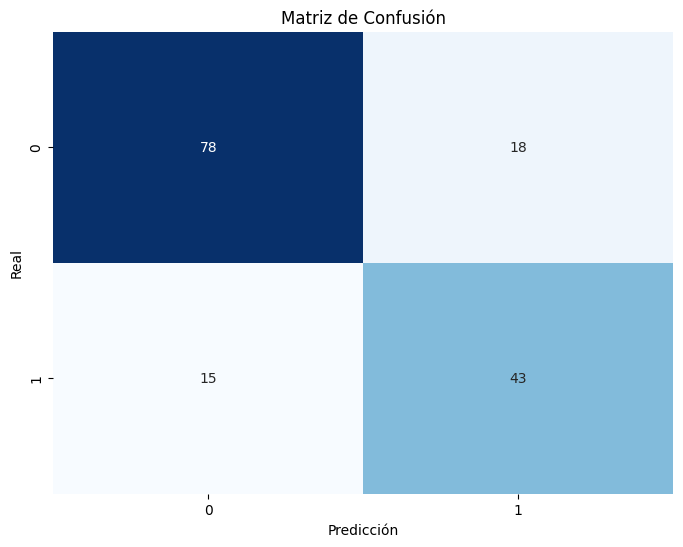


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        96
           1       0.70      0.74      0.72        58

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



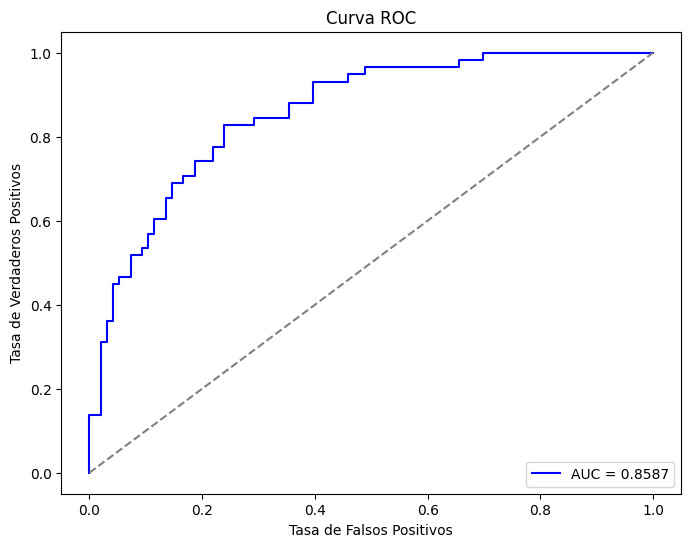

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, best_boosting_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
